In [1]:
from transformers.utils import hub, SAFE_WEIGHTS_NAME, SAFE_WEIGHTS_INDEX_NAME

/workspace/py_venvs/qdora/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [1]:
from transformers import AutoModelForCausalLM, AutoConfig

/workspace/py_venvs/qdora/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
from transformers.modeling_flash_attention_utils import _flash_supports_window_size

In [2]:
is_flash_attn_2_available()

True

In [5]:
_flash_supports_window_size

True

In [2]:
# config = AutoConfig.from_pretrained("meta-llama/Meta-Llama-3-70B-Instruct")
config = AutoConfig.from_pretrained("meta-llama/Meta-Llama-3.1-405B-Instruct")

In [3]:
# model = AutoModelForCausalLM.from_pretrained("meta-llama/Meta-Llama-3-70B-Instruct")
model = AutoModelForCausalLM.from_pretrained("meta-llama/Meta-Llama-3.1-405B-Instruct")

Loading checkpoint shards:  56%|█████▌    | 107/191 [02:17<02:24,  1.72s/it]

In [ ]:
MODEL_NAME = args["model_name"]
idx = hub.cached_file(MODEL_NAME, SAFE_WEIGHTS_INDEX_NAME)
pretrained_files, _ = hub.get_checkpoint_shard_files(MODEL_NAME, idx)


LlamaForCausalLM(
  (model): LlamaModel(
    (embed_tokens): Embedding(128256, 8192)
    (layers): ModuleList(
      (0-79): 80 x LlamaDecoderLayer(
        (self_attn): LlamaSdpaAttention(
          (q_proj): Linear(in_features=8192, out_features=8192, bias=False)
          (k_proj): Linear(in_features=8192, out_features=1024, bias=False)
          (v_proj): Linear(in_features=8192, out_features=1024, bias=False)
          (o_proj): Linear(in_features=8192, out_features=8192, bias=False)
          (rotary_emb): LlamaRotaryEmbedding()
        )
        (mlp): LlamaMLP(
          (gate_proj): Linear(in_features=8192, out_features=28672, bias=False)
          (up_proj): Linear(in_features=8192, out_features=28672, bias=False)
          (down_proj): Linear(in_features=28672, out_features=8192, bias=False)
          (act_fn): SiLU()
        )
        (input_layernorm): LlamaRMSNorm()
        (post_attention_layernorm): LlamaRMSNorm()
      )
    )
    (norm): LlamaRMSNorm()
  )
  (lm_head)

In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import re

In [2]:
logfile = "/workspace/git/fsdp_qlora/experiments/llama_large/logs/large_llama_405b_hqq_4bit.log"
logfile2 = "/workspace/git/fsdp_qlora/experiments/llama_large/logs/large_llama_405b_hqq_mixed_bit.log"
logfile3 = "/workspace/git/fsdp_qlora/experiments/llama_large/logs/large_llama_405b_hqq_2bit.log"

In [3]:
logs = Path(logfile).read_text().split("\n")
logs2 = Path(logfile2).read_text().split("\n")
logs3 = Path(logfile3).read_text().split("\n")

In [4]:
def extract_loss(l):
	match = re.search(r'Loss\s+([0-9.]+)', l)
	loss_value = match.group(1)
	return loss_value

In [5]:
losses = [float(extract_loss(l)) for l in logs if "Loss" in l][50:]
losses2 = [float(extract_loss(l)) for l in logs2 if "Loss" in l][50:]
losses3 = [float(extract_loss(l)) for l in logs3 if "Loss" in l][50:]

<Axes: >

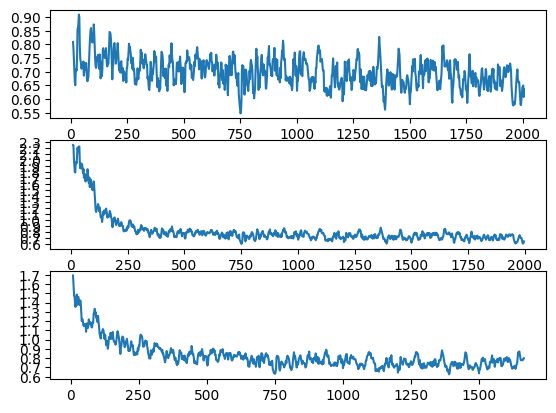

In [6]:
import matplotlib.pyplot as plt
# pd.Series(losses).plot()
# smooth the plot
# pd.Series(losses).rolling(100).mean().plot()
# smooth plot all logs in different figures
fix, axes = plt.subplots(3, 1)

# show 0,0.25,0.5,0.75,1,... in y axis
axes[0].yaxis.set_major_locator(plt.MultipleLocator(0.05))
axes[1].yaxis.set_major_locator(plt.MultipleLocator(0.1))
axes[2].yaxis.set_major_locator(plt.MultipleLocator(0.1))

pd.Series(losses).rolling(10).mean().plot(ax=axes[0])
pd.Series(losses2).rolling(10).mean().plot(ax=axes[1])
pd.Series(losses3).rolling(10).mean().plot(ax=axes[2])
